In [1]:
import pandas as pd
import numpy as np

from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

/usr/local/lib64/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv('sf04classification/train.csv', encoding='utf8', index_col='_id')
df_test = pd.read_csv('sf04classification/test.csv', encoding='utf8', index_col='_id')
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)

In [3]:
#train.info() #full, got objects

In [4]:
#test.info() #no tgt column. full, got objects

In [5]:
def preproc_data(df_input):
    df_output = df_input.copy()

    # category code
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 
                                                   'education', 'default', 
                                                   'housing', 'loan', 
                                                   'contact', 'month', 
                                                   'day_of_week', 
                                                   'poutcome'])
        
    return df_output

In [6]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)



In [7]:
X = df_train_preproc.drop(['target'], axis=1)
X_test = df_test_preproc.drop(['target'], axis=1)

y = df_train_preproc['target']
y_test = df_test_preproc['target']

print(X.shape, X_test.shape, y.shape, y_test.shape)

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train_.shape, X_test_.shape, y_train_.shape, y_test_.shape)

(24712, 63) (16476, 63) (24712,) (16476,)
(16557, 63) (8155, 63) (16557,) (8155,)


dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_, y_train_)

lr = LogisticRegression()
lr.fit(X_train_, y_train_)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_, y_train_)

### Ниже показан самый главный классификатор (nr.employed)

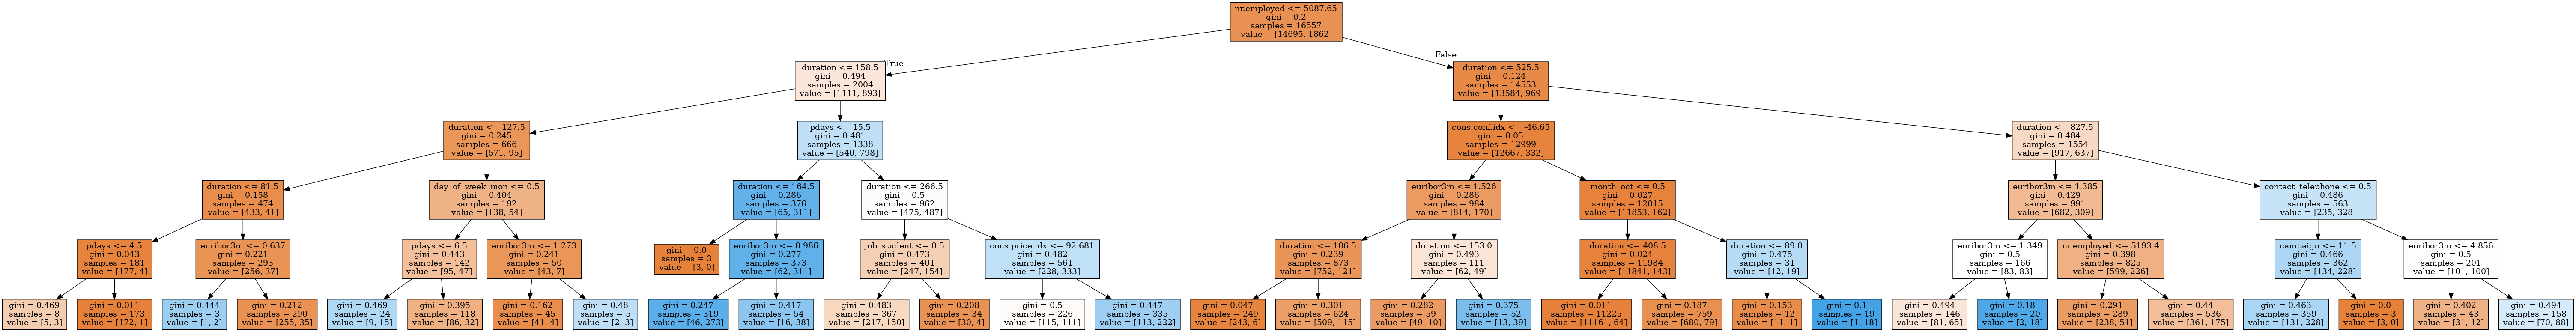

In [8]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)

dot_data = StringIO()
export_graphviz(dtc, feature_names=X_train_.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Ниже показан самый главный классификатор (nr.employed)

In [23]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)
dtc_kfold = cross_val_score(
    dtc,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_, y_train_)
knn_kfold = cross_val_score(
    knn,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()


lr = LogisticRegression()
lr.fit(X_train_, y_train_)
lr_kfold = cross_val_score(
    lr,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()


rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_, y_train_)
rfc_kfold = cross_val_score(
    rfc,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()

print("Cross Val Score")
print("dtc_kfold: ", dtc_kfold,
      "\nknn_kfold: ", knn_kfold,
      "\nlr_kfold: ", lr_kfold,
      "\nrfc_kfold: ", rfc_kfold      
     )

Cross Val Score
dtc_kfold:  0.922985852647925 
knn_kfold:  0.7142502399129851 
lr_kfold:  0.9290878145098416 
rfc_kfold:  0.9075391457965217


In [24]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)


knn = KNeighborsClassifier(n_neighbors=2000, n_jobs=-1, algorithm="brute", weights="distance")
knn.fit(X_train_, y_train_)


lr = LogisticRegression()
lr.fit(X_train_, y_train_)


rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_, y_train_)

print("Roc AUC Score")
print(
    "DTC: ", roc_auc_score(y_test_, dtc.predict_proba(X_test_)[:,1]),
    "\nKNN: ", roc_auc_score(y_test_, knn.predict_proba(X_test_)[:,1]),
    "\nLR: ", roc_auc_score(y_test_, lr.predict_proba(X_test_)[:,1]),
    "\nRFC: ", roc_auc_score(y_test_, rfc.predict_proba(X_test_)[:,1])

)

Roc AUC Score
DTC:  0.9207019550671003 
KNN:  0.9261202945684273 
LR:  0.9323285110836979 
RFC:  0.9056951142013383
